# CNN Experiments in time series

In [128]:
import numpy
import pandas
import matplotlib.pyplot as plt

In [115]:
class GARCHTimeSeriesDataGenerator:
    """
    A class for generating time series data using the GARCH process.

    Parameters:
    - start_date (str): The start date of the time series.
    - mu (float): The mean of the GARCH process. Default is 0.
    - omega (float): The constant term in the GARCH process. Default is 0.1.
    - alpha (list): The list of alpha coefficients in the GARCH process. Default is [0.5].
    - beta (list): The list of beta coefficients in the GARCH process. Default is [0.5].
    """

    def __init__(self, start_date, mu=0, omega=0.1, alpha=[0.5], beta=[0.5]):
        self.start_date = pandas.to_datetime(start_date)
        self.mu = mu
        self.omega = omega
        self.alpha = alpha
        self.beta = beta

    def simulate(self, n) -> pandas.Series:
        """
        Simulates a GARCH process and returns a pandas Series of simulated returns.

            Parameters:
            - n (int): The number of periods to simulate.

            Returns:
            - simulated_series (pandas.Series): A pandas Series of simulated returns.
        """
        # Initialize arrays
        errors = numpy.random.normal(size=n)
        sigmas = numpy.zeros_like(errors)
        returns = numpy.zeros_like(errors)

        # Simulate GARCH process
        for t in range(1, n):
            sigmas[t] = numpy.sqrt(
                self.omega + self.alpha[0] * errors[t-1]**2 + self.beta[0] * sigmas[t-1]**2)
            returns[t] = self.mu + sigmas[t] * errors[t]

        # Create date range
        dates = pandas.date_range(self.start_date, periods=n)

        # Create pandas Series
        simulated_series = pandas.Series(returns, index=dates)

        return simulated_series



### First Experiment

This first experiment uses a CNN for anomaly detection, by mapping a value to a canvas of pixels

In [171]:
# Create a GARCH time series data generator
generator = GARCHTimeSeriesDataGenerator(start_date="2023-01-01")

# Simulate 365 days of data (assuming daily data)
data = generator.simulate(365)

# Normalize data to a range of 0 to 16777215
normalized_data = (data - data.min()) / (data.max() - data.min()) * 16777215

In [172]:
# Create a canvas with 365 pixels
canvas = numpy.zeros((normalized_data.size, 3), dtype=numpy.uint8)
dates = []

# Iterate through each pixel and set the color based on normalized data
for i in range(normalized_data.size):
  # Extract the normalized value for the current day
  value = normalized_data.iloc[i]
  date = normalized_data.index[i]
  # Convert the value to RGB components
  red = (int(value) & 0x00FF0000) >> 16
  green = (int(value) & 0x0000FF00) >> 8
  blue = int(value) & 0x000000FF

  # Set the pixel's RGB values
  canvas[i] = [red, green, blue]
  dates.append(date)
  
canvas_dictionary = {dates[i]: canvas[i] for i in range(len(dates))}

In [173]:
plt.imshow(canvas_dictionary.values())
plt.axis('off')

(-0.5, 2.5, 364.5, -0.5)

In [182]:
import datetime

# Create dictionaries for each month
canvas_dictionaries_by_month = {}
for month in range(1, 13):
    # Filter canvas_dictionary by month
    filtered_dictionary = {key: value for key, value in canvas_dictionary.items() if key.month == month}
    # Add filtered dictionary to canvas_dictionaries_by_month
    month_name = datetime.date(1900, month, 1).strftime('%B')
    canvas_dictionaries_by_month[f'canvas_dictionary_{month_name.lower()}'] = filtered_dictionary
print("-----------------")
print(canvas_dictionaries_by_month)
print("-----------------")
# Print the canvas dictionaries for each month
for month, dictionary in canvas_dictionaries_by_month.items():
    print("\n-----------------")
    print(f'{month}: {dictionary}')
    print("-----------------\n")


-----------------
{'canvas_dictionary_january': {Timestamp('2023-01-01 00:00:00'): array([120, 114, 219], dtype=uint8), Timestamp('2023-01-02 00:00:00'): array([122, 113, 211], dtype=uint8), Timestamp('2023-01-03 00:00:00'): array([123,  82,  91], dtype=uint8), Timestamp('2023-01-04 00:00:00'): array([104, 202, 160], dtype=uint8), Timestamp('2023-01-05 00:00:00'): array([127, 156,  35], dtype=uint8), Timestamp('2023-01-06 00:00:00'): array([ 95, 246, 132], dtype=uint8), Timestamp('2023-01-07 00:00:00'): array([168,  42, 139], dtype=uint8), Timestamp('2023-01-08 00:00:00'): array([197, 166,  15], dtype=uint8), Timestamp('2023-01-09 00:00:00'): array([ 87,  26, 137], dtype=uint8), Timestamp('2023-01-10 00:00:00'): array([141, 205, 177], dtype=uint8), Timestamp('2023-01-11 00:00:00'): array([ 92,   2, 150], dtype=uint8), Timestamp('2023-01-12 00:00:00'): array([ 53, 115, 120], dtype=uint8), Timestamp('2023-01-13 00:00:00'): array([164,   7, 238], dtype=uint8), Timestamp('2023-01-14 00:00:

-----canvas_dictionary_january-----


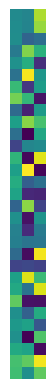

-----canvas_dictionary_february-----


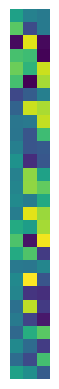

-----canvas_dictionary_march-----


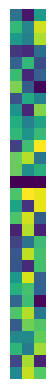

-----canvas_dictionary_april-----


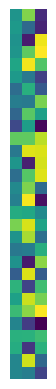

-----canvas_dictionary_may-----


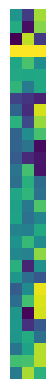

-----canvas_dictionary_june-----


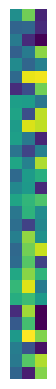

-----canvas_dictionary_july-----


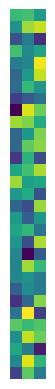

-----canvas_dictionary_august-----


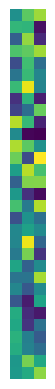

-----canvas_dictionary_september-----


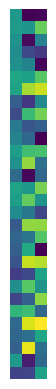

-----canvas_dictionary_october-----


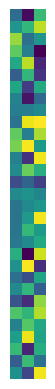

-----canvas_dictionary_november-----


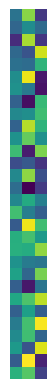

-----canvas_dictionary_december-----


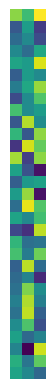

In [183]:
for month, dictionary in canvas_dictionaries_by_month.items():
    canvas_dictionary_month = {key: value for key, value in dictionary.items()}
    print(f"-----{month}-----")
    plt.imshow(canvas_dictionary_month.values())
    plt.axis('off')
    plt.show()
